# Specular Model Tester: Present

## For when you want to show it to other people

### The actual model tester code notebook is a hodgepodge mess of all sorts of random nonsense...

This notebook is meant to showcase the Specular Model for Titan, comparing it to real data and thus validating it. 

Notably it has not successfully been validated yet, but we've learned a lot so far. 

Anyway, let's just load the files and imports we need, then let's talk about them.

In [1]:
#IMPORTS 
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
from scipy import ndimage
from pyvims import VIMS
import statistics
from matplotlib.colors import LogNorm

#READ IN SPECULAR MODEL (and lambertian model as well, it's good for comparison)
#2) Now we have to load in the viewing geometry simulation data
#This is the same no matter what method we're using, as these are always local.

X = 21
Y = 19
Z = 37
#These are hard coded as I know exactly what files these are.

dataWin1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_0.93w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin1[i][j][k] = float(row[i])
            if (math.isnan(dataWin1[i][j][k])):
                dataWin1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.08w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin2[i][j][k] = float(row[i])
            if (math.isnan(dataWin2[i][j][k])):
                dataWin2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.27w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin3[i][j][k] = float(row[i])
            if (math.isnan(dataWin3[i][j][k])):
                dataWin3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.59w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin4[i][j][k] = float(row[i])
            if (math.isnan(dataWin4[i][j][k])):
                dataWin4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.01w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin5[i][j][k] = float(row[i])
            if (math.isnan(dataWin5[i][j][k])):
                dataWin5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.69w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin6[i][j][k] = float(row[i])
            if (math.isnan(dataWin6[i][j][k])):
                dataWin6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.79w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin7[i][j][k] = float(row[i])
            if (math.isnan(dataWin7[i][j][k])):
                dataWin7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_5.00w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin8[i][j][k] = float(row[i])
            if (math.isnan(dataWin8[i][j][k])):
                dataWin8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
        
#Now do it again for the Lambertian files. 

dataWin1L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin2L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin3L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin4L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin5L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin6L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin7L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataWin8L = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_0.93wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin1L[i][j][k] = float(row[i])
            if (math.isnan(dataWin1L[i][j][k])):
                dataWin1L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.08wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin2L[i][j][k] = float(row[i])
            if (math.isnan(dataWin2L[i][j][k])):
                dataWin2L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.27wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin3L[i][j][k] = float(row[i])
            if (math.isnan(dataWin3L[i][j][k])):
                dataWin3L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.59wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin4L[i][j][k] = float(row[i])
            if (math.isnan(dataWin4L[i][j][k])):
                dataWin4L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.01wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin5L[i][j][k] = float(row[i])
            if (math.isnan(dataWin5L[i][j][k])):
                dataWin5L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.69wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin6L[i][j][k] = float(row[i])
            if (math.isnan(dataWin6L[i][j][k])):
                dataWin6L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.79wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin7L[i][j][k] = float(row[i])
            if (math.isnan(dataWin7L[i][j][k])):
                dataWin7L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_5.00wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataWin8L[i][j][k] = float(row[i])
            if (math.isnan(dataWin8L[i][j][k])):
                dataWin8L[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1

#READ IN LOWER KRAKEN DATA
lldivisions = 1 #how finely do we divide the bins? "1" is one bin for each lat-lon. "0.5" would be every half.
maxLat = 90
minLat = 50
maxLon = 340
minLon = 280 #Default this box is [90,50] and [340,280] for Lat and Lon respectively. Meant to capture Kraken.
#Make sure all four of the above are INTEGERS.
latTicks = int((maxLat-minLat)/lldivisions)+1
lonTicks = int((maxLon-minLon)/lldivisions)+1
#The +1 counts the "0" index; we are inclusive of both ends.

#SETUP

#This program is complicated enough we need to declare the objects and data structures.
#The main storage is a 2D array in lat and lon. Every point in this array is a bin. Each bin contains every
#Pixel in that bin. The Pixels themselves need to be an object. 
#For dynamic declaration, we start by defining the Pixel class.
class Pixel:
    cube = " " #Cube of origin
    coors = [0.,0.] #Pixel coors in cube. 
    res = 0. #Resolution 
    inci = 0. #Incidence angle
    emis = 0. #Emission angle
    azim = 0. #Azimuth angle
    win0, win1, win2, win3, win4, win5, win6, win7 = 0.,0.,0.,0.,0.,0.,0.,0. #The intensity at the windows.
    #You may rightfully ask "why isn't this an array?" 
    #Answer: because for some reaosn when it's an array the memory gets rewritten after I read it in.
    #Solution: explicitly declare everything. Yes there most certainly is an array way to do it,
    #But I don't want to be here all day.
    winN0, winN1, winN2, winN3, winN4, winN5, winN6, winN7 = 0.,0.,0.,0.,0.,0.,0.,0. #Will hold the normalized window values.
    empty = 0 #Just a toggle, "0" means this is an empty pixel.
#No methods or functions at the moment, this is just a fancy data array for the most part. 
#In order to avoid implicit typing complications, let's make the array of arrays explicit.
#For this we will need an empty Pixel

dummy = Pixel()
bins = [[[dummy for x in range(2)] for x in range(lonTicks)] for x in range(latTicks)]
#stored as (lat,lon,pixel). Currently only 2 empty pixels at every location. This is to force
#the program to recognize it is an array of arrays. 
displayBin = [[0. for x in range(lonTicks)] for x in range(latTicks)]
#This one just holds the final image we will generate.

#Also calculate the relative sizes of everything so we can tell the figure what size to be later.
relDim = latTicks/lonTicks

    #READ IN INFO
with open("CUBEEATERCSV2.csv") as csv_file: #Open up the file with the curated data.
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if (line_count >= 2): #Ignore the header lines                
                #First, we need to check if we actually need the pixel.
                #The coordinates are not actually stored on the pixel itself unlike most other data.
                lat = float(row[3])
                lon = float(row[4])
                
                #Only add the pixel if it is within our bounds. 
                #Otherwise do nothing.
                if (maxLat >= lat and minLat <= lat and maxLon >= lon and minLon <= lon):
                    
                    #Every line is a pixel that needs to be sorted. Let's get all of the pixel's attributes:
                    pixel = Pixel()
                    pixel.cube = row[0]
                    pixel.coors = [int(row[1]),int(row[2])]
                    pixel.res = float(row[8])
                    pixel.inci = float(row[5])
                    pixel.emis = float(row[6])
                    pixel.azim = float(row[7])

                    pixel.win0 = float(row[10])
                    pixel.win1 = float(row[11])
                    pixel.win2 = float(row[12])
                    pixel.win3 = float(row[13])
                    pixel.win4 = float(row[14])
                    pixel.win5 = float(row[15])
                    pixel.win6 = float(row[16])
                    pixel.win7 = float(row[17])

                    #Now the pixel also has a normalized value we store here.
                    #This normalization is accomplished by setting the sum of all 8 windows to 1.
                    #This removes any bias to "Brighter" or "Darker" images. 
                    pixelTotal = (pixel.win0 + pixel.win1 + pixel.win2 + pixel.win3
                                    + pixel.win4 + pixel.win5 + pixel.win6 + pixel.win7)

                    pixel.winN0 = pixel.win0/pixelTotal
                    pixel.winN1 = pixel.win1/pixelTotal
                    pixel.winN2 = pixel.win2/pixelTotal
                    pixel.winN3 = pixel.win3/pixelTotal
                    pixel.winN4 = pixel.win4/pixelTotal
                    pixel.winN5 = pixel.win5/pixelTotal
                    pixel.winN6 = pixel.win6/pixelTotal
                    pixel.winN7 = pixel.win7/pixelTotal

                    pixel.empty = 1 #This isn't an empty pixel. 
                    
                    if (pixel.res < 100): #Arbitrary "only high res data allowed" check
                        #Now that we HAVE the pixel's data, we need to cram it into our bins.
                        #We need the math to go from latlon to indices. 
                        ilat = 0 #lat index
                        ilon = 0 #lon index
                        tempA = 0. #Temporary angle storage during loop. 

                        tempA = minLat - lldivisions #subtracted to avoid an off by one error.
                        while (ilat <= latTicks):
                            tempA = tempA + lldivisions
                            if (tempA > lat):
                                if (tempA - lat > abs((tempA-lldivisions) - lat)):
                                    ilat = ilat-1 #This is the rounding check: which point is better? 
                                break
                            ilat = ilat+1
                        tempA = minLon - lldivisions #subtracted to avoid an off by one error.
                        while (ilon <= lonTicks):
                            tempA = tempA + lldivisions
                            if (tempA > lon):
                                if (tempA - lon > abs((tempA-lldivisions) - lon)):
                                    ilon = ilon-1 #This is the rounding check: which point is better? 
                                break
                            ilon = ilon+1

                        #We now have the coordinates of the bin our pixel is in.
                        if (len(bins[ilat][ilon]) == 2):
                            #Because of my awkward method of explicit definition, we have to check
                            #The first two additions manually.
                            if (bins[ilat][ilon][0].empty == 0):
                                bins[ilat][ilon][0] = pixel
                            elif (bins[ilat][ilon][1].empty == 0):
                                bins[ilat][ilon][1] = pixel
                            else:
                                #If both pixels are real, add a new one. 
                                bins[ilat][ilon].append(pixel)
                        else: 
                            #If this area already has a lot, append the pixel.
                            bins[ilat][ilon].append(pixel)

                    #And now we have completed reading in the data.
            line_count += 1

#BOOKKEEPING: declare where the windows are. 
windowum = [0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576]
windowInd = [80, 108, 120, 139, 165, 206, 212, 344]
windowIndAlt = [3,12,24,43,69,110,116,248]


## Resources

### What did we just load in?

#### And other preliminary stuff.

We just loaded in a few things: various code imports (some of which may not be necessary it's hard to keep track), the Specular Titan Model, the Lambertian Titan Model, and the Lower Kraken VIMS Curated Data Set.

The Specular Titan Model and Lambertian Titan Model are very similar and take the same form. They contain viewing gometry information for two types of Titan: the global methane ocean, and the ideal lambertian model. SRTC++ created both of these models. The information is arranged not by location, but by viewing geometry: every 5 degrees of incidence, emission, and azimuth is a "pixel" in this data set. Only the 8 atmospheric windows of Titan were simulated, so the information has eight "copies." Both Specular and Lambertian are formatted in the same way.

The Lower Kraken VIMS Curated Data Set is a list of pixels extracted from various cubes across the Cassini mission. Each pixel contains viewing geometry data, values for all eight atmospheric windows, what cube it's from, and its location in said cube. There are 48 cubes in the sample in total, each of which were selected because they either clearly showed Lower Kraken or had Lower Kraken in an extreme viewing situation.

The ultimate goal is to show that the Specular Model is valid by recovering the shape of Lower Kraken by analyzing the spectral data in the pixels. The simplest method of doing this--simply looking at a pixel and assigning a score based on how well it matches the data--is insufficient. To demonstrate, let's take a picture of Kraken from VIMS (cube CM_1790066425_1 from 105).

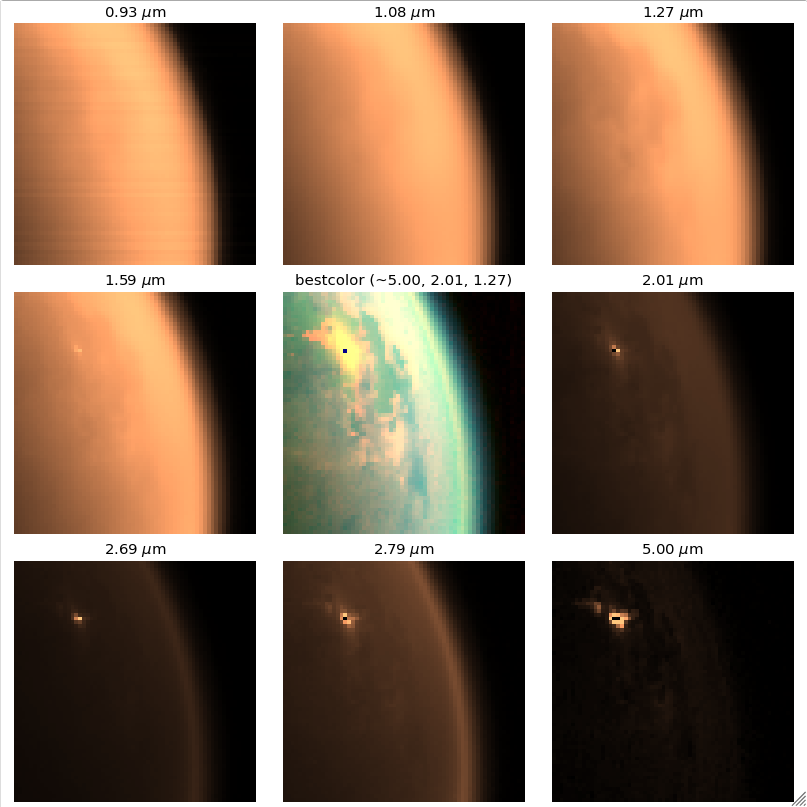

If we apply the simple "score" method we extract the following:

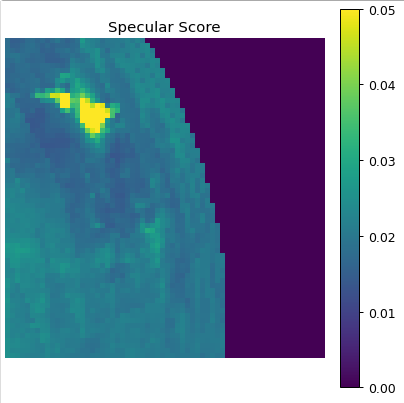

Lower scores are better. 

This very easily identifies the specular reflection, but has very obvious difficulty telling the sea from the land, despite visually it being obvious to us humans that there's a distinciton here. One section of lower Kraken might have it shoreline reclaimable, but the rest of it is entirely missing, and there's even a somewaht good score area in a place there isn't even a lake! (Though, to be fair, we humans could mistake that dark patch there for liquid.)

(A note: the simple method is still normalizing the intensity across all 8 wavelengths so dimmer areas don't automatically get better scores than brighter ones. Second note: the "lines" on the image appear because the resolution of the model's viewing geometries are 5 degrees, every time we cross a boundary the model changes slightly.) 

Now, in some viewing geometries the simple method does work, but this is only in favorable situations, such as this very clear-cut image at the north pole (CM_1787307197_1, T104):

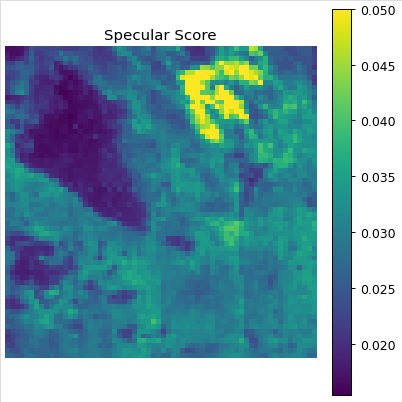

Unfortunately we tend to get good scores on *dunes* as well, and dunes definitely aren't lakes. (CM_1578263500_1, T40)

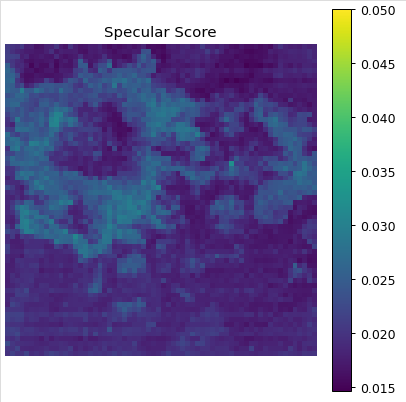

Selk crater is clearly picked out, but the dunes score about as well as lakes do. 

Fortunately, we are not without recourse: while at any given *single* viewing angle the situation may be ambiguous, if we examine a single location from several viewing angles, we should be able to identify which areas are lakes and which are not. Lake and land behavior at extreme angles in particular are quite different, espeically in the five micron window. 

That is why we have a database of cubes all looking at roughly the same area from as many different viewing angles as I could find. (Of decent quality). 

## Analysis

### Let's do stuff with the data.

#### Here we go!

So we have data looking at Lower Kraken from a lot of angles, and we have it all consolidated together. Let's actually see what happens if we assign a score to them. 

Now that we're looking at the actual method let's discuss what exactly the "Score" we're currently using is. I've used several methods across this test--the above images are using a measure of the "standard deviation" from model, for instance. However, this model is a chi-squared model, where every pixel is given a score based on a chi-squared analysis, and if that pixel is looked at multiple times, we average out the score values to see, *overall*, what the score is. So if we look at it all we get...

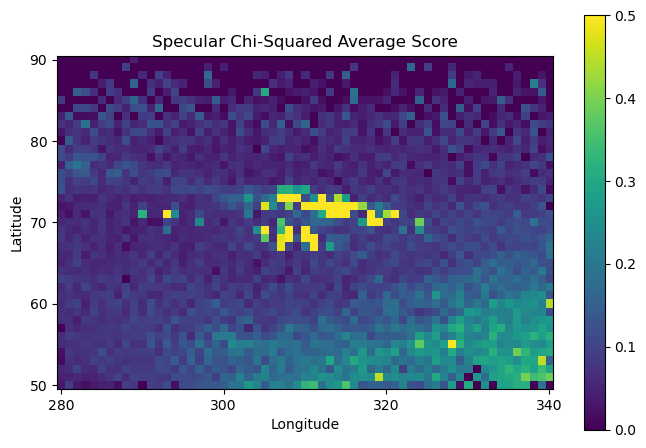

In [13]:
#As there is no reason to re-ingest the data every time we want to look at it, we split off the 
#ASSEMBLE IMAGE and DISPLAY sections here so they can be modified on their own.

    #ASSEMBLE IMAGE
    
#The image itself can't be read directly out of our "bins", we need to tell it what to display.
#This will be altered later, but for now, we have a primitive display.
i,j = 0,0
while (i < latTicks):
    j = 0
    while (j < lonTicks):
        ans = 0. #For buffering our result.
        for pix in bins[i][j]:
            #Every pixel has a value, average it for this primitive mode.
            ans = ans + pix.win0
        displayBin[i][j] = len(bins[i][j])
        j = j+1
    i = i+1

#The image itself can't be read directly out of our "bins", we need to tell it what to display.
#This will be altered later, but for now, we have a primitive display.
i,j = 0,0
while (i < latTicks):
    j = 0
    while (j < lonTicks):
        ans = 0
        for pix in bins[i][j]:
            #We have selected a pixel at this point.
            #First, grab the data for all 8 windows. Store it in an array. Becasue now we can do that!
            pixelWindows = [pix.win0,pix.win1,pix.win2,pix.win3,pix.win4,pix.win5,pix.win6,pix.win7]
            normPixelWindows = [pix.winN0,pix.winN1,pix.winN2,pix.winN3,pix.winN4,pix.winN5,pix.winN6,pix.winN7]
            geomWindows = [0.,0.,0.,0.,0.,0.,0.,0.]
            geomWindowsL = [0.,0.,0.,0.,0.,0.,0.,0.]

            #Now we need to find the geometries for each pixel. Specifically:
            #incidence, emission, azimuth. 
            #These are contained within the geofiles.
            inci = pix.inci
            emis = pix.emis
            azim = pix.azim

            #We are now armed with i, e, and phi(azimuth); in addition to the 8 wavelengths. 
            #Each pixel contains 11 pieces of information. 
            #Now we need to grab the comparison information from the viewing geometries.
            #The viewing geometries are in divisions of five degrees, so first all values need to be rounded.
            inci = round(inci/5)*5
            emis = round(emis/5)*5
            azim = round(azim/5)*5
    
            #Now one thing we HAVEN'T done is load in the gometries of hte models.
            geomWindows[0] = dataWin1[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[1] = dataWin2[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[2] = dataWin3[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[3] = dataWin4[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[4] = dataWin5[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[5] = dataWin6[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[6] = dataWin7[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[7] = dataWin8[int(inci / 5)][int(emis / 5)][int(azim / 5)]            
            geomWindowsL[0] = dataWin1L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[1] = dataWin2L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[2] = dataWin3L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[3] = dataWin4L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[4] = dataWin5L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[5] = dataWin6L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[6] = dataWin7L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[7] = dataWin8L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            #Maybe should have made the viewing geometry data in one array... oh well.
            #Anyway, that's all the data we need. Now comes the actual processing steps!
            
            score = 0 #To determine which is the best. Absurdly large at the start.
            scoreL = 0 #Lambertian as well.

            totalGeoLight = 0.
            totalGeoLightL = 0.
            for item in geomWindows:
                totalGeoLight = totalGeoLight + item
            for item in geomWindowsL:
                totalGeoLightL = totalGeoLightL + item
            #Now scale all the values
            #So the total for all of them is 1, like with the pixel normalization.
            normGeomWindows = np.array(geomWindows)/totalGeoLight
            normGeomWindowsL = np.array(geomWindowsL)/totalGeoLightL
            #Any bias for "dimmer" areas is now removed, everything is scaled to "total luminosity 1." 
            #This may break around specular points or errors, unsure. 
            #Also since we aren't performing a search this will be MUCH faster...
            
            k=0
            while (k<8):
                score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
                scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
                k=k+1
            
            #The comparison is done with a chi-squared test.
            #k = 2
            #score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
            #scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
            #k = 4
            #score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
            #scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
            #k = 7
            #score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
            #scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
            #k=k+1

            if (inci == 0 and emis == 0 and azim == 0): #This ensures that the outside gets cut out.
                score = 0
                scoreL = 0
                #This also will block out one very specific type of direct specular point
                #This usually should not matter but be aware: (0,0,0) will be scraped.
            ans = ans + score
        displayBin[i][j] = ans/len(bins[i][j])
        j = j+1
    i = i+1
    
    #DISPLAY
    
fig, ax = plt.subplots(figsize = (8,8*relDim))

image = ax.imshow(displayBin, cmap="viridis", origin="lower",vmax=0.5)
ax.set(title = 'Specular Chi-Squared Average Score', xlabel = "Longitude", ylabel= "Latitude") 
ax.set_xticks([0,20,40,60],labels = ['280','300','320','340'])
ax.set_yticks([0,10,20,30,40], labels=['50','60','70','80','90'])
fig.colorbar(image, ax=ax)
#Perhaps one day we shall add dynamic axes ticks... but for now leave them off.

plt.show()

#fig, ax = plt.subplots(figsize = (8,8*relDim))

#scale = 0.1

#image = ax.imshow(displayBin, cmap="seismic", origin="lower", vmin=-scale, vmax=scale)
#ax.set(title = 'Pixels With Hits', xticks = [], yticks = []) 

Well that didn't work. 

This display contains the entirity of KRaken Mare, with Lower Kraken (the focus of the data set) being around the 60 latitude mark. Notably we don't see much of anything there. We do see higher up in Upper Kraken places where specular reflections occured, but we don't see any indication of there being a difference between sea and land.

However, something interesting occurs if we ignore most of the wavelengths and only consider 5, 2, and 1.3 microns (the ones used to create titancolor2 bestcolor images)



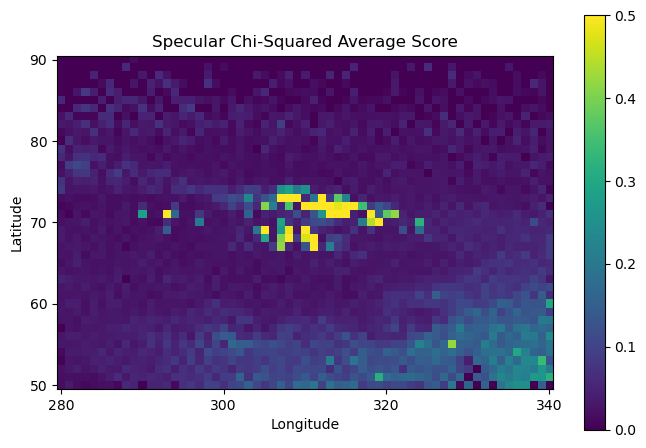

In [14]:
#As there is no reason to re-ingest the data every time we want to look at it, we split off the 
#ASSEMBLE IMAGE and DISPLAY sections here so they can be modified on their own.

    #ASSEMBLE IMAGE
    
#The image itself can't be read directly out of our "bins", we need to tell it what to display.
#This will be altered later, but for now, we have a primitive display.
i,j = 0,0
while (i < latTicks):
    j = 0
    while (j < lonTicks):
        ans = 0. #For buffering our result.
        for pix in bins[i][j]:
            #Every pixel has a value, average it for this primitive mode.
            ans = ans + pix.win0
        displayBin[i][j] = len(bins[i][j])
        j = j+1
    i = i+1

#The image itself can't be read directly out of our "bins", we need to tell it what to display.
#This will be altered later, but for now, we have a primitive display.
i,j = 0,0
while (i < latTicks):
    j = 0
    while (j < lonTicks):
        ans = 0
        for pix in bins[i][j]:
            #We have selected a pixel at this point.
            #First, grab the data for all 8 windows. Store it in an array. Becasue now we can do that!
            pixelWindows = [pix.win0,pix.win1,pix.win2,pix.win3,pix.win4,pix.win5,pix.win6,pix.win7]
            normPixelWindows = [pix.winN0,pix.winN1,pix.winN2,pix.winN3,pix.winN4,pix.winN5,pix.winN6,pix.winN7]
            geomWindows = [0.,0.,0.,0.,0.,0.,0.,0.]
            geomWindowsL = [0.,0.,0.,0.,0.,0.,0.,0.]

            #Now we need to find the geometries for each pixel. Specifically:
            #incidence, emission, azimuth. 
            #These are contained within the geofiles.
            inci = pix.inci
            emis = pix.emis
            azim = pix.azim

            #We are now armed with i, e, and phi(azimuth); in addition to the 8 wavelengths. 
            #Each pixel contains 11 pieces of information. 
            #Now we need to grab the comparison information from the viewing geometries.
            #The viewing geometries are in divisions of five degrees, so first all values need to be rounded.
            inci = round(inci/5)*5
            emis = round(emis/5)*5
            azim = round(azim/5)*5
    
            #Now one thing we HAVEN'T done is load in the gometries of hte models.
            geomWindows[0] = dataWin1[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[1] = dataWin2[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[2] = dataWin3[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[3] = dataWin4[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[4] = dataWin5[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[5] = dataWin6[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[6] = dataWin7[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindows[7] = dataWin8[int(inci / 5)][int(emis / 5)][int(azim / 5)]            
            geomWindowsL[0] = dataWin1L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[1] = dataWin2L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[2] = dataWin3L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[3] = dataWin4L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[4] = dataWin5L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[5] = dataWin6L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[6] = dataWin7L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            geomWindowsL[7] = dataWin8L[int(inci / 5)][int(emis / 5)][int(azim / 5)]
            #Maybe should have made the viewing geometry data in one array... oh well.
            #Anyway, that's all the data we need. Now comes the actual processing steps!
            
            score = 0 #To determine which is the best. Absurdly large at the start.
            scoreL = 0 #Lambertian as well.

            totalGeoLight = 0.
            totalGeoLightL = 0.
            for item in geomWindows:
                totalGeoLight = totalGeoLight + item
            for item in geomWindowsL:
                totalGeoLightL = totalGeoLightL + item
            #Now scale all the values
            #So the total for all of them is 1, like with the pixel normalization.
            normGeomWindows = np.array(geomWindows)/totalGeoLight
            normGeomWindowsL = np.array(geomWindowsL)/totalGeoLightL
            #Any bias for "dimmer" areas is now removed, everything is scaled to "total luminosity 1." 
            #This may break around specular points or errors, unsure. 
            #Also since we aren't performing a search this will be MUCH faster...
            
            #k=0
            #while (k<8):
                #score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
                #scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
                #k=k+1
            
            #The comparison is done with a chi-squared test.
            k = 2
            score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
            scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
            k = 4
            score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
            scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
            k = 7
            score = score + (((normPixelWindows[k] - normGeomWindows[k])**2) / normGeomWindows[k])
            scoreL = scoreL + (((normPixelWindows[k] - normGeomWindowsL[k])**2) / normGeomWindowsL[k])
            k=k+1

            if (inci == 0 and emis == 0 and azim == 0): #This ensures that the outside gets cut out.
                score = 0
                scoreL = 0
                #This also will block out one very specific type of direct specular point
                #This usually should not matter but be aware: (0,0,0) will be scraped.
            ans = ans + score
        displayBin[i][j] = ans/len(bins[i][j])
        j = j+1
    i = i+1
    
    #DISPLAY
    
fig, ax = plt.subplots(figsize = (8,8*relDim))

image = ax.imshow(displayBin, cmap="viridis", origin="lower",vmax=0.5)
ax.set(title = 'Specular Chi-Squared Average Score', xlabel = "Longitude", ylabel= "Latitude") 
ax.set_xticks([0,20,40,60],labels = ['280','300','320','340'])
ax.set_yticks([0,10,20,30,40], labels=['50','60','70','80','90'])
fig.colorbar(image, ax=ax)
#Perhaps one day we shall add dynamic axes ticks... but for now leave them off.

plt.show()

#fig, ax = plt.subplots(figsize = (8,8*relDim))

#scale = 0.1

#image = ax.imshow(displayBin, cmap="seismic", origin="lower", vmin=-scale, vmax=scale)
#ax.set(title = 'Pixels With Hits', xticks = [], yticks = []) 

Now we can see *some* shoreline, near the bottom and right of Lower Kraken. So it is possible to recover the information in some cases, at least! The question is, why isn't it working in the genreal case, why is it partially working when we look at *less* information, and how can we make it work on all sides? (After all, we don't see even a hint of the leftmost shore...) 

I have a few theories as to what might be going on.

(note: any point in the above diagram actually at 0 just means "no data")

### Limited Viewing Geometries:

Examining the cubes, the ranges for the viewing geometries tell a story: incidence angle ranges from 40-100 degrees, emission angle 40-70 degrees, and azimuth ranges across the full 1-180 degrees. Note that the emission angle is not giving us any extreme values at all, which are where the most important telltale signs of specular situations are. Now, I did pick out the data set by hand, so it's possible I just missed the unusual angles, but we may have to contend with the fact that some locaitons simply weren't examined in said extreme situations. 

However, if they do exist, some kind of full-database search of the VIMS cubes should be able to turn it up. Searching by machine rather than by eye may offer a solution.

### Overrepresentation in the Data:

There are more cubes at some viewing angles than others. Viewing angles that are represented more often will thus "contaminate" the data set and remove the benefit of examining multiple geometries: if most of them are from one angle, might as well have just looked at one image. 

This means the data set will need to be catered to provide a roughly linear/even distribution of viewing angles. We likely want more extreme values than "regular" ones.

### Adjacency and Resolution:

Each pixel is assigned a location. However, in every VIMS cube image, each pixel is of a different size based on the resolution. Which means that some pixels assigned to some locations will actually be views of a lot more than just the one location, potentially taking in photons from the land or even from the atmosphere if we are near the limb. This effect can't be that strong, as I have forced a "use only high resolution images" rule on the results in a few tests, it didn't change the results that much. However, this does need to be considered, especially if this method is to be made automatic in any way. 

### Window Overrepresentation?:

This is the one I'm least sure about. Something about looking at all the atmospheric windows makes the results worse than if we just look at some of the windows. It may be similar to the data overrepresentation problem: more of the atmospheric windows do not have clear distinctions between land and sea. 5 microns is often the clearest distinction, while 0.9 is often the worst. By removing extra windows and only considering 3, 5 microns goes from being 1/8th of the data to 1/3rd, and thus it's sharp distinctions become enhanced. 